In [2]:
import librosa
from madmom.audio.signal import Signal
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch

def spec_extraction(file_name, win_size):
    # print(currentFilePath)

    x_test = []

    # y, sr = librosa.load(file_name, sr=8000)
    # *********** madmom.Signal() is faster than librosa.load() ***********
    y = Signal(file_name, sample_rate=8000, dtype=np.float32, num_channels=1)
    S = librosa.core.stft(y, n_fft=1024, hop_length=80*1, win_length=1024)
    x_spec = np.abs(S)
    x_spec = librosa.core.power_to_db(x_spec, ref=np.max)
    x_spec = x_spec.astype(np.float32)
    num_frames = x_spec.shape[1]

    # for padding
    padNum = num_frames % win_size
    if padNum != 0:
        len_pad = win_size - padNum
        padding_feature = np.zeros(shape=(513, len_pad))
        x_spec = np.concatenate((x_spec, padding_feature), axis=1)
        num_frames = num_frames + len_pad

    for j in range(0, num_frames, win_size):
        x_test_tmp = x_spec[:, range(j, j + win_size)].T
        x_test.append(x_test_tmp)
    x_test = np.array(x_test)

    # for normalization

    x_train_mean = np.load('x_data_mean_total_31.npy')
    x_train_std = np.load('x_data_std_total_31.npy')
    x_test = (x_test-x_train_mean)/(x_train_std+0.0001)
    x_test = x_test[:, :, :, np.newaxis]

    return x_test, x_spec

def spec_extraction_torch(file_name, win_size):
    y = Signal(file_name, sample_rate=8000, dtype=np.float32, num_channels=1)
    S = librosa.core.stft(y, n_fft=1024, hop_length=80*1, win_length=1024)
    x_spec = np.abs(S)
    x_spec = librosa.core.power_to_db(x_spec, ref=np.max)
    x_spec = x_spec.astype(np.float32)
    num_frames = x_spec.shape[1]
    
    
    return

In [3]:
file_name = '/home/svcapp/userdata/flo_new_music/audio_20201228/400/185/400185539.aac'

In [4]:
x_test, x_spec = spec_extraction(file_name, win_size=31)

In [6]:
x_test.shape, x_spec.shape

((680, 31, 513, 1), (513, 21080))

In [7]:
y = Signal(file_name, sample_rate=8000, dtype=np.float32, num_channels=1)
S = librosa.core.stft(y, n_fft=1024, hop_length=80*1, win_length=1024)
x_spec = np.abs(S)
x_spec = librosa.core.power_to_db(x_spec, ref=np.max)
x_spec = x_spec.astype(np.float32)
num_frames = x_spec.shape[1]

In [25]:
from data_utils import load_audio_sample
from pydub import AudioSegment
from nnAudio import Spectrogram
import torch

sample = load_audio_sample(file_name)

In [51]:
spec_layer = Spectrogram.STFT(n_fft=1024, hop_length=80, sr=8000, output_format="Magnitude")
nn_spec = spec_layer(torch.Tensor(sample))
nn_spec_madmom = spec_layer(torch.Tensor(y))

STFT kernels created, time used = 0.0751 seconds


In [54]:
torch.log10(nn_spec+1e-10)*10

tensor([[[-100., -100., -100.,  ..., -100., -100., -100.],
         [-100., -100., -100.,  ..., -100., -100., -100.],
         [-100., -100., -100.,  ..., -100., -100., -100.],
         ...,
         [-100., -100., -100.,  ..., -100., -100., -100.],
         [-100., -100., -100.,  ..., -100., -100., -100.],
         [-100., -100., -100.,  ..., -100., -100., -100.]]])

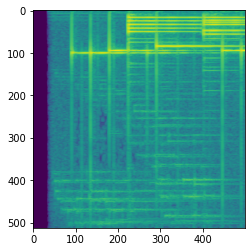

In [37]:
# import matplotlib.pyplot as pyplot
plt.imshow(x_spec[:,:500])
# x_spec.shape

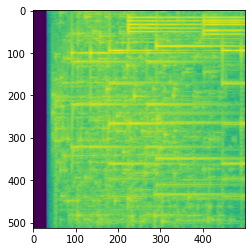

In [49]:
plt.imshow(torch.log10(nn_spec[0,:,:500]+1e-10)*8)

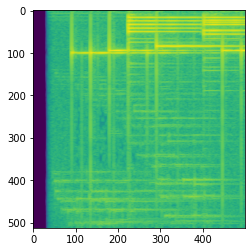

In [53]:
plt.imshow(torch.log10(nn_spec_madmom[0,:,:500]+1e-10)*10)

In [29]:
nnp_spec.shape

NameError: name 'nnp_spec' is not defined

In [22]:
x_tensor = torch.Tensor(x_spec)

In [39]:
torch.nn.functional.pad(x_tensor, (0, 31 - x_spec.shape[1]%31)).reshape(513, -1, 31).unsqueeze(-1).shape

torch.Size([513, 680, 31, 1])

In [32]:
x_spec.shape[1]%31

29

In [1]:
S.shape

NameError: name 'S' is not defined

In [6]:
spec= x_spec
win_size=31
num_frames = spec.shape[1]

# for padding
padNum = num_frames % win_size
if padNum != 0:
    len_pad = win_size - padNum
    padding_feature = np.zeros(shape=(513, len_pad))
    spec = np.concatenate((spec, padding_feature), axis=1)
    num_frames = num_frames + len_pad
spec.shape

(513, 21080)

In [9]:
sliced = spec.reshape(spec.shape[0], -1, win_size)

In [11]:
sliced.shape, x_test.shape

((513, 680, 31), (680, 31, 513, 1))

In [17]:
x_test[0,:,:10,0], sliced

array([[-6.0013442 , -6.81877285, -6.30316486, -6.24794782, -6.09805365,
        -5.94267922, -5.83122597, -5.92886796, -6.02770013, -6.0667776 ],
       [-6.01327607, -6.81433199, -6.30740831, -6.25045943, -6.09547143,
        -5.94108341, -5.83048287, -5.92772669, -6.03006693, -6.06030764],
       [-5.99205799, -6.82135747, -6.29765885, -6.25674608, -6.09215202,
        -5.94060612, -5.83183838, -5.92379471, -6.02716382, -6.05595952],
       [-5.99883813, -6.80927376, -6.30332155, -6.24194846, -6.0985853 ,
        -5.94464733, -5.82943579, -5.9241988 , -6.01918495, -6.05642358],
       [-5.99790974, -6.80923858, -6.30092527, -6.238656  , -6.09345811,
        -5.94074081, -5.83072837, -5.92258126, -6.02358995, -6.05441824],
       [-5.98846172, -6.80617535, -6.29815304, -6.23731426, -6.09610866,
        -5.93610284, -5.8274354 , -5.92241026, -6.0199903 , -6.05091774],
       [-5.98568682, -6.80436637, -6.30406491, -6.22954854, -6.09663563,
        -5.93050439, -5.82822126, -5.91964264